Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [5]:
data.shape

(6914, 34)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    6137
1.0     777
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [13]:
x = sm.add_constant(x)

In [14]:
resampling = TomekLinks()
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_not_stay_in_the_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0])/len(x_resampled))

length of oversampled data is  6811
Number of people who would not stay in the neighborhood in resampled data 777
Number of people who would stay in the neighborhood in resampled data 6034
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.11408016443987667
Proportion of subscription data in resampled data is  0.8859198355601233


In [15]:
x_resampled

,const,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,Time_living_in_barri_LESS THAN 10 YEARS,Time_living_in_barri_MORE THAN 10 YEARS,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1.0,0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.0,1,0.0,0,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.0,1,1.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1,0.0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,1.0,1,1.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6807,1.0,1,0.0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6808,1.0,1,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
6809,1.0,1,1.0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [16]:
y_resampled['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.289501
         Iterations: 35
                                           Results: Logit
Model:                    Logit                                   Pseudo R-squared:      0.184      
Dependent Variable:       Would_not_stay_in_the_neighborhood      AIC:                   4023.5871  
Date:                     2021-04-23 07:54                        BIC:                   4296.6389  
No. Observations:         6811                                    Log-Likelihood:        -1971.8    
Df Model:                 39                                      LL-Null:               -2417.6    
Df Residuals:             6771                                    LLR p-value:           9.0119e-162
Converged:                0.0000                                  Scale:                 1.0000     
No. Iterations:           35.0000                                                                   
--------------------------------------------------------------------

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
result.pvalues.sort_values(ascending=False)

Social_class_MIDDLE-MIDDLE                      9.959955e-01
Social_class_MIDDLE-HIGH                        9.959912e-01
Social_class_MIDDLE-LOW                         9.959707e-01
Social_class_LOW                                9.959447e-01
const                                           9.956700e-01
Barri_transport_NORMAL                          9.888359e-01
STREETS CLEANING_GOOD                           9.587597e-01
Barri_evolution_IT IS THE SAME                  8.840832e-01
CIRCULATION_GOOD                                8.441084e-01
FACADES AND BUILDING CONSERVATION_GOOD          8.423106e-01
MUNICIPAL MARKETS_GOOD                          7.000324e-01
Gender                                          6.953635e-01
Monthly_family_income_< 1000 EUROS              6.728234e-01
Barri_evolution_IT IS WORSE                     6.598780e-01
BCN_over_barri_future                           5.899289e-01
Barri_transport_GOOD                            5.298105e-01
GARBAGE COLLECTION_GOOD 

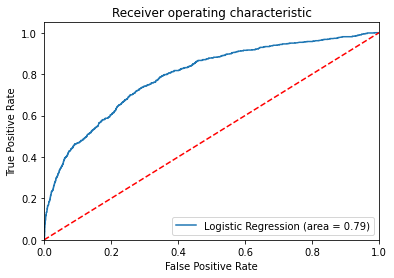

In [19]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [20]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [20]:
for i in ['House_size_> 150 M2', 'House_size_< 50 M2', 'House_size_51-100 M2', 'BCN_over_barri_transport',
         'BCN_over_barri_future', 'MUNICIPAL POLICE_GOOD']:
    del x_resampled[i]

In [21]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306937
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.185      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2798.5075  
Date:                  2021-04-16 07:58                      BIC:                 3016.1146  
No. Observations:      4448                                  Log-Likelihood:      -1365.3    
Df Model:              33                                    LL-Null:             -1675.9    
Df Residuals:          4414                                  LLR p-value:         1.0865e-109
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [22]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         8.234355e-01
BCN_over_barri_evolution                        8.174424e-01
Owns_a_car                                      8.143063e-01
FACADES AND BUILDING CONSERVATION_GOOD          6.199172e-01
Barri_evolution_IT IS THE SAME                  6.158862e-01
Gender                                          5.569276e-01
Monthly_family_income_< 1000 EUROS              5.402965e-01
CIRCULATION_GOOD                                5.342310e-01
Social_class_LOW                                4.022367e-01
PUBLIC LIGHTING_GOOD                            3.972783e-01
Social_class_MIDDLE-LOW                         3.517468e-01
Social_class_MIDDLE-MIDDLE                      3.376534e-01
Barri_evolution_IT IS WORSE                     3.319255e-01
Barri_transport_GOOD                            2.703887e-01
STREETS CLEANING_GOOD                           2.506413e-01
MUNICIPAL MARKETS_GOOD                          2.073011e-01
Monthly_family_income_20

In [23]:
del x_resampled['Gender']

In [24]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306975
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.185      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2796.8528  
Date:                  2021-04-16 07:58                      BIC:                 3008.0598  
No. Observations:      4448                                  Log-Likelihood:      -1365.4    
Df Model:              32                                    LL-Null:             -1675.9    
Df Residuals:          4415                                  LLR p-value:         2.8788e-110
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [25]:
result.pvalues.sort_values(ascending=False)

Owns_a_car                                      8.732697e-01
GARBAGE COLLECTION_GOOD                         8.271261e-01
BCN_over_barri_evolution                        7.997478e-01
FACADES AND BUILDING CONSERVATION_GOOD          6.255004e-01
Barri_evolution_IT IS THE SAME                  5.980777e-01
Monthly_family_income_< 1000 EUROS              5.708880e-01
CIRCULATION_GOOD                                5.297768e-01
Social_class_LOW                                4.508952e-01
Social_class_MIDDLE-LOW                         3.981519e-01
PUBLIC LIGHTING_GOOD                            3.880905e-01
Social_class_MIDDLE-MIDDLE                      3.850244e-01
Barri_evolution_IT IS WORSE                     3.488932e-01
Barri_transport_GOOD                            2.690828e-01
STREETS CLEANING_GOOD                           2.397458e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.155179e-01
Monthly_family_income_2001-3000 EUROS           2.046869e-01
MUNICIPAL MARKETS_GOOD  

In [26]:
del x_resampled['Living_alone']

In [27]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307346
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.184      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2798.1535  
Date:                  2021-04-16 07:58                      BIC:                 3002.9603  
No. Observations:      4448                                  Log-Likelihood:      -1367.1    
Df Model:              31                                    LL-Null:             -1675.9    
Df Residuals:          4416                                  LLR p-value:         3.0722e-110
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [28]:
result.pvalues.sort_values(ascending=False)

Monthly_family_income_< 1000 EUROS              9.688909e-01
GARBAGE COLLECTION_GOOD                         8.511774e-01
BCN_over_barri_evolution                        7.688352e-01
Owns_a_car                                      7.580306e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.638869e-01
Barri_evolution_IT IS THE SAME                  5.469787e-01
CIRCULATION_GOOD                                5.340892e-01
Social_class_LOW                                5.325098e-01
Social_class_MIDDLE-MIDDLE                      4.932066e-01
Social_class_MIDDLE-LOW                         4.813250e-01
PUBLIC LIGHTING_GOOD                            3.694633e-01
Barri_evolution_IT IS WORSE                     3.693815e-01
STREETS CLEANING_GOOD                           2.579254e-01
Barri_transport_GOOD                            2.566951e-01
Monthly_family_income_2001-3000 EUROS           2.357622e-01
Social_class_MIDDLE-HIGH                        2.249172e-01
ASPHALT AND STREET CONSE

In [29]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Owns_a_car                                      -0.0031      0.010     -0.308      0.758      -0.023       0.017
BCN_over_barri_evolution                        -0.0043      0.015     -0.294      0.769      -0.033       0.024
BCN_over_barri_satisfaction_of_living            0.0480      0.022      2.217      0.027       0.006       0.090
Time_living_in_barri_LESS THAN 10 YEARS          0.1194      0.021      5.604      0.000       0.078       0.161
Time_living_in_barri_MORE THAN 10 YEARS          0.0403      0.015      2.638      0.008       0.010      

In [30]:
result.pred_table()

array([[3830.,   62.],
       [ 461.,   95.]])

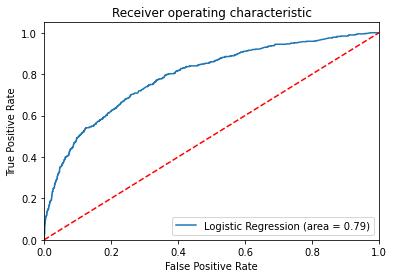

In [31]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()